<a href="https://colab.research.google.com/github/Sathyakumarnsk/Action_recognition/blob/master/Loading_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/gdrive')
 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
proj_path_drive = 'gdrive/My Drive/Action_recog_data/' 
proj_path_colab='content/data/'

In [101]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.path.abspath(""))))


In [102]:
!pwd

/


In [103]:
!unzip data_curated.zip -d /content/


unzip:  cannot find or open data_curated.zip, data_curated.zip.zip or data_curated.zip.ZIP.


In [104]:
ROOT_DIR = os.path.dirname(os.path.abspath(""))
print(ROOT_DIR)
os.path.abspath("")

/


'/'

# **Inspecting data**

In [105]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

In [106]:
print(tf.__version__)

2.3.0


In [107]:
data_dir=os.path.abspath('/content/data_curated')

In [108]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/data_curated')

In [109]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

800


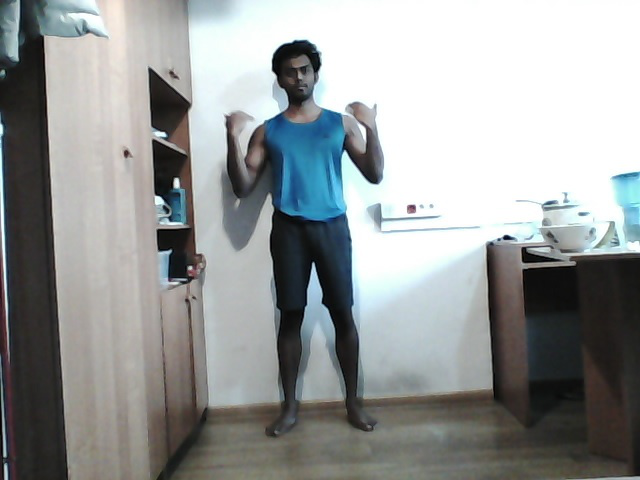

In [110]:
first_class = list(data_dir.glob('follow/*'))
PIL.Image.open(str(first_class[0]))

## Load using keras.preprocessing

In [111]:
batch_size = 32
img_height = 180
img_width = 180

In [112]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 4 classes.
Using 640 files for training.


In [113]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 4 classes.
Using 160 files for validation.


In [114]:
class_names = train_ds.class_names
print(class_names)

['follow', 'pour', 'pp', 'stop']


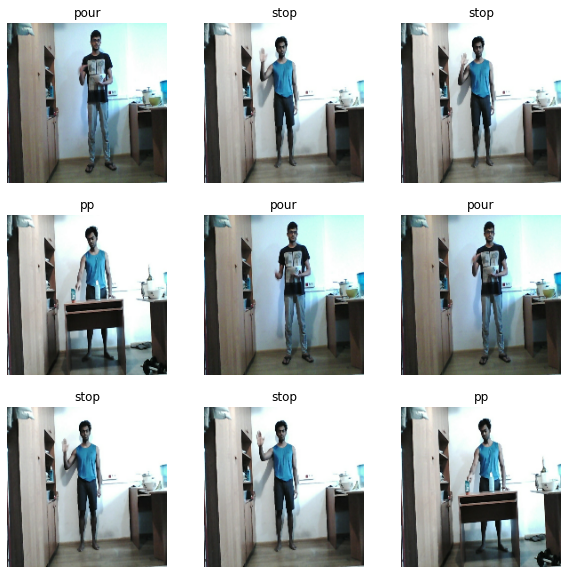

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [116]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


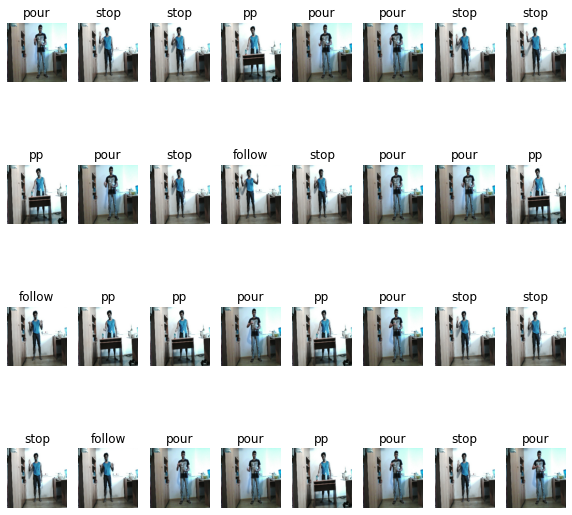

In [117]:
plt.figure(figsize=(10, 10))
for image_idx,image in enumerate(image_batch):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
      

In [118]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [119]:
num_classes = 4

model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [120]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [121]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
20/20 [==============================] - 26s 1s/step - loss: 44.9600 - accuracy: 0.5641 - val_loss: 1.4285e-05 - val_accuracy: 1.0000
Epoch 2/3
20/20 [==============================] - 26s 1s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.0371e-06 - val_accuracy: 1.0000
Epoch 3/3
20/20 [==============================] - 26s 1s/step - loss: 4.9043e-07 - accuracy: 1.0000 - val_loss: 1.7434e-07 - val_accuracy: 1.0000


In [122]:
model.predict_classes

<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdf27bfba90>>